Importing the neccessary libraries for cleaning this dataset

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
pd.set_option('display.max_columns',None

Importing the CSV file from my local drive

In [ ]:
df = pd.read_csv('weather.csv', index_col = 'DATE')
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')
df['year'] = df.index.year

Inpecting the data

In [ ]:
df

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WDFM,WESD,WSF1,WSF2,WSF5,WSFG,WSFM,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01,year
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,28,22,NaN,330.0,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,22,NaN,290.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,NaN,38,25,NaN,310.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1970
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,23,NaN,300.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1970
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,35,21,NaN,270.0,NaN,NaN,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,NaN,0.08,0.0,0.0,60.0,67,54,NaN,NaN,300.0,290.0,NaN,NaN,NaN,NaN,19.9,25.1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.00,0.0,0.0,54.0,58,48,NaN,NaN,270.0,270.0,NaN,NaN,NaN,NaN,19.9,23.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,50.0,56,43,NaN,NaN,260.0,260.0,NaN,NaN,NaN,NaN,23.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [ ]:
df.shape

(19287, 45)

In [ ]:
df.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF1', 'WDF2', 'WDF5',
       'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22', 'WV01',
       'year'],
      dtype='object')

In [ ]:
df.dtypes

STATION     object
NAME        object
ACMH       float64
ACSH       float64
AWND       float64
FMTM       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX         int64
TMIN         int64
TSUN       float64
WDF1       float64
WDF2       float64
WDF5       float64
WDFG       float64
WDFM       float64
WESD       float64
WSF1       float64
WSF2       float64
WSF5       float64
WSFG       float64
WSFM       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT11       float64
WT13       float64
WT14       float64
WT15       float64
WT16       float64
WT17       float64
WT18       float64
WT21       float64
WT22       float64
WV01       float64
year         int32
dtype: object

In [ ]:
df.describe()

,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WDFM,WESD,WSF1,WSF2,WSF5,WSFG,WSFM,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01,year
count,9615.000000,9616.000000,14171.000000,10124.000000,12269.000000,19287.000000,19287.000000,19285.000000,6164.000000,19287.000000,19287.000000,31.000000,9611.000000,9669.000000,9586.000000,5121.000000,1.0,6071.000000,9614.000000,9669.000000,9585.000000,7463.000000,1.0,7132.0,1253.0,1287.0,336.0,364.0,181.0,108.0,3916.0,140.0,14.0,2185.0,887.0,42.0,6577.0,60.0,1167.0,5.0,49.0,1.0,19287.000000
mean,57.886635,60.665557,11.234329,1438.505828,1383.805852,0.117869,0.064671,0.209645,55.554672,61.820086,47.535283,160.064516,212.060139,215.391457,215.093887,230.659832,360.0,0.050338,18.729436,22.049085,27.187710,25.545384,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1995.904288
std,30.612050,33.353307,4.791638,758.281872,631.437135,0.330974,0.598955,1.272844,16.566519,17.410481,16.418437,626.175797,100.481364,97.356582,98.786041,95.287299,NaN,0.279142,5.764950,7.352290,8.839751,8.034343,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.243656
min,0.000000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,-2.000000,0.000000,10.000000,10.000000,0.000000,23.000000,360.0,0.000000,6.000000,6.900000,0.000000,8.100000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1970.000000
25%,30.000000,30.000000,8.280000,1101.750000,1023.000000,0.000000,0.000000,0.000000,43.000000,48.000000,35.000000,0.000000,160.000000,160.000000,160.000000,180.000000,360.0,0.000000,15.000000,17.000000,21.000000,19.500000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1983.000000
50%,60.000000,70.000000,10.510000,1526.000000,1458.000000,0.000000,0.000000,0.000000,56.000000,62.000000,48.000000,0.000000,210.000000,210.000000,210.000000,225.000000,360.0,0.000000,17.000000,21.000000,25.900000,24.200000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1996.000000
75%,80.000000,90.000000,13.420000,1850.000000,1837.000000,0.040000,0.000000,0.000000,71.000000,77.000000,62.000000,0.000000,300.000000,310.000000,310.000000,315.000000,360.0,0.000000,21.900000,25.900000,32.000000,30.000000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2009.000000
max,100.000000,100.000000,308.030000,32767.000000,2359.000000,7.800000,30.300000,28.000000,91.000000,103.000000,82.000000,2832.000000,360.000000,360.000000,360.000000,360.000000,360.0,6.400000,46.100000,314.100000,214.100000,71.400000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2022.000000


In [ ]:
df.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF1', 'WDF2', 'WDF5',
       'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22', 'WV01',
       'year'],
      dtype='object')

Checking for the percentage of null values in the data.

In [ ]:
null_percentage = df.apply(pd.isnull).sum()/df.shape[0]
null_percentage

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
year       0.000000
dtype: float64

Assigning the null_percentage to the variable valid_columns, which will then become the dataset itself

In [ ]:
valid_columns = df.columns[null_percentage<.05]

In [ ]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'year'], dtype='object')

STATION - STATION,     

NAME - NAME,

PRCP - PRECIPITATION

SNOW -SNOW,

SNWD - SNOW DEPTH,

TMAX - MAXIMUM TEMPERATURE,

TMIN - MINIMUM TEMPERATURE,

year - year

In [ ]:
df.dtypes

STATION     object
NAME        object
ACMH       float64
ACSH       float64
AWND       float64
FMTM       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX         int64
TMIN         int64
TSUN       float64
WDF1       float64
WDF2       float64
WDF5       float64
WDFG       float64
WDFM       float64
WESD       float64
WSF1       float64
WSF2       float64
WSF5       float64
WSFG       float64
WSFM       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT11       float64
WT13       float64
WT14       float64
WT15       float64
WT16       float64
WT17       float64
WT18       float64
WT21       float64
WT22       float64
WV01       float64
year         int32
dtype: object

In [ ]:
df = df[valid_columns].copy()

In [ ]:
df

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,year
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,1970
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,1970
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,1970
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,1970
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,1970
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,2022
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,2022
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,2022


Checking for sum of Nan cells.


In [ ]:
df.isna().sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       2
TMAX       0
TMIN       0
year       0
dtype: int64

In [ ]:
df.duplicated()

DATE
1970-01-01    False
1970-01-02    False
1970-01-03    False
1970-01-04    False
1970-01-05    False
              ...  
2022-10-17    False
2022-10-18    False
2022-10-19    False
2022-10-20    False
2022-10-21    False
Length: 19287, dtype: bool

In [ ]:
df['NAME'].str.split(pat=',')

DATE
1970-01-01    [JFK INTERNATIONAL AIRPORT,  NY US]
1970-01-02    [JFK INTERNATIONAL AIRPORT,  NY US]
1970-01-03    [JFK INTERNATIONAL AIRPORT,  NY US]
1970-01-04    [JFK INTERNATIONAL AIRPORT,  NY US]
1970-01-05    [JFK INTERNATIONAL AIRPORT,  NY US]
                             ...                 
2022-10-17    [JFK INTERNATIONAL AIRPORT,  NY US]
2022-10-18    [JFK INTERNATIONAL AIRPORT,  NY US]
2022-10-19    [JFK INTERNATIONAL AIRPORT,  NY US]
2022-10-20    [JFK INTERNATIONAL AIRPORT,  NY US]
2022-10-21    [JFK INTERNATIONAL AIRPORT,  NY US]
Name: NAME, Length: 19287, dtype: object

In [ ]:
df

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,year
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,1970
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,1970
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,1970
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,1970
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,1970
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,2022
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,2022
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,2022


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.shape

(19287, 8)

In [ ]:
df.columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'year'], dtype='object')

I calculated my own average temperature cause there were missing cells in the data set. Then deleted the old column.

In [ ]:
df['TAVG'] = (df['TMAX'] + df['TMAX']) / 2

In [ ]:
df.dtypes

STATION     object
NAME        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX         int64
TMIN         int64
year         int32
TAVG       float64
dtype: object

Creating a line plot illustrating the variation of temperature over time for the columns average temperature, maximum temperature, and minimum temperatur from the DataFrame df.

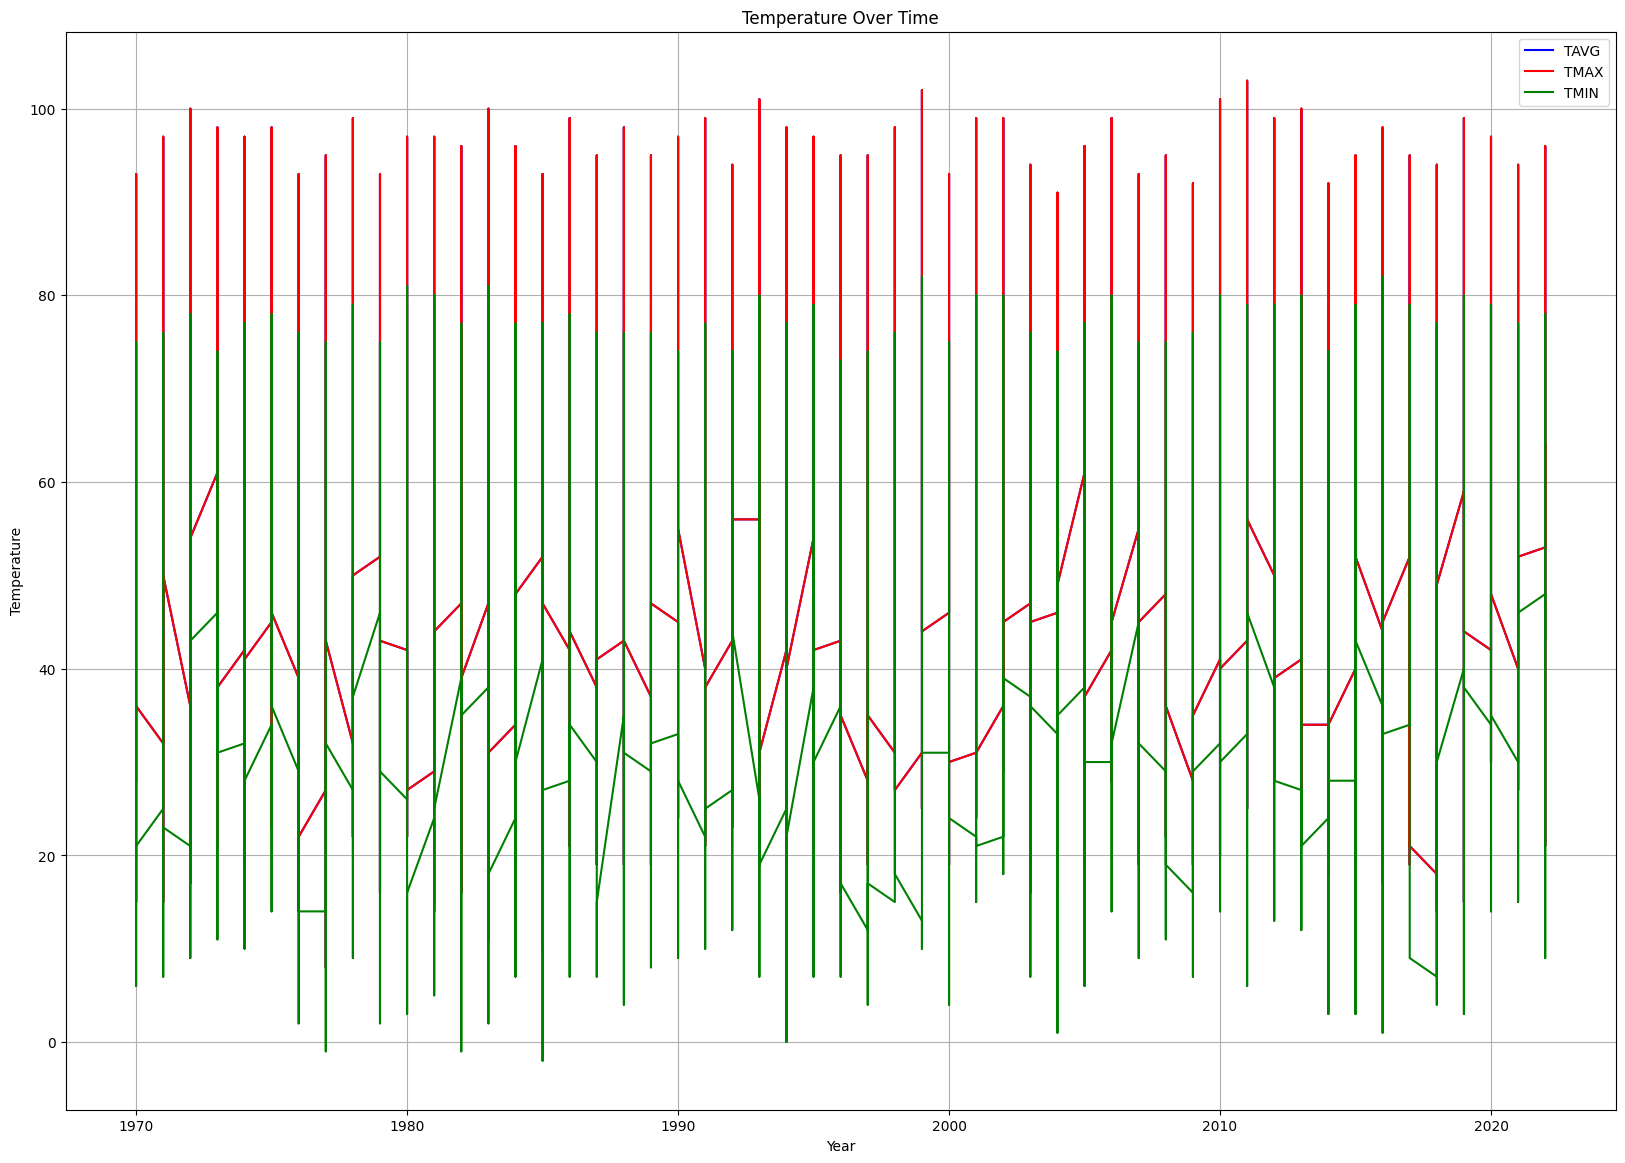

In [ ]:
plt.figure(figsize=(20, 14))
plt.plot(df['year'], df['TAVG'], label='TAVG', color='blue')
plt.plot(df['year'], df['TMAX'], label='TMAX', color='red')
plt.plot(df['year'], df['TMIN'], label='TMIN', color='green')

plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['year'] = df['year'].astype(str)

In [ ]:
df.apply(pd.isnull).sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
year       0
TAVG       0
dtype: int64

In [ ]:
df

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,year,TAVG
DATE,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,1970,28.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,1970,31.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,1970,38.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,1970,31.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,1970,35.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,2022,67.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,2022,58.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,2022,56.0


In [ ]:
df = df.ffill()

In [ ]:
df.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [ ]:
df.columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'year',
       'TAVG'],
      dtype='object')

In [ ]:
df.apply(lambda x: (x==9999).sum())

STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
year       0
TAVG       0
dtype: int64

In [ ]:
df = df.ffill()

In [ ]:
df.columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'year',
       'TAVG'],
      dtype='object')

counting the occurrences for each unique value in the 'year' column.

In [ ]:
df.year.value_counts().sort_index()

year
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: count, dtype: int64

<Axes: xlabel='DATE'>

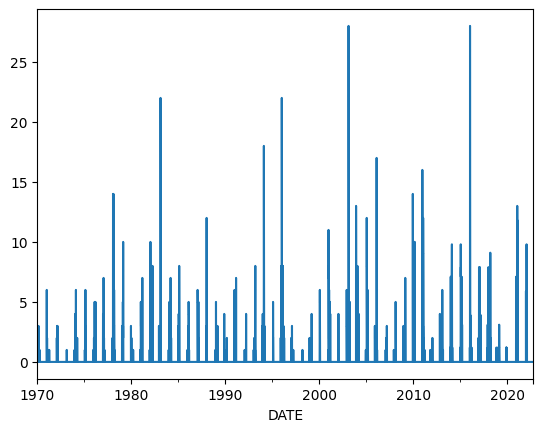

In [ ]:
df["SNWD"].plot()

In [ ]:
df

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,year,TAVG
DATE,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,1970,28.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,1970,31.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,1970,38.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,1970,31.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,1970,35.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,2022,67.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,2022,58.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,2022,56.0


In [ ]:
df.dtypes

STATION     object
NAME        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX         int64
TMIN         int64
year        object
TAVG       float64
dtype: object

In [ ]:
snowfall_by_year = df.groupby('year')['SNWD'].sum()

In [ ]:
snowfall_by_year

year
1970     24.0
1971     20.0
1972     18.0
1973      2.0
1974     28.0
1975     18.0
1976     49.0
1977     82.0
1978    259.0
1979     70.0
1980      7.0
1981     49.0
1982     90.0
1983     98.0
1984     64.0
1985     74.0
1986     32.0
1987     53.0
1988     74.0
1989     21.0
1990     13.0
1991     13.0
1992     12.0
1993     50.0
1994    155.0
1995     60.0
1996    248.0
1997     10.0
1998      7.0
1999      9.0
2000     68.0
2001    130.0
2002     48.0
2003    278.0
2004     96.0
2005    163.0
2006     64.0
2007     19.0
2008     24.0
2009    118.0
2010    180.0
2011    170.0
2012      9.0
2013     22.2
2014    184.9
2015    178.1
2016    149.5
2017     84.3
2018     74.3
2019     14.7
2020     36.2
2021    161.4
2022     61.4
Name: SNWD, dtype: float64

In [ ]:
df

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,year,TAVG
DATE,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,1970,28.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,1970,31.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,1970,38.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,1970,31.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,1970,35.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,2022,67.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,2022,58.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,2022,56.0


This is the next observation. Creating a new column in the DataFrame df called "target", which contains the maximum temperature ("TMAX")

In [ ]:
df["target"] = df.shift(-1)["TMAX"]

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.1)

In [ ]:
predictors = df.columns[~df.columns.isin(["target", "NAME", "STATION"])]

In [ ]:
def backtest(df, model, predictors, start=3650, step=90):

  all_predictions=[]



  for i in range(start, df.shape[0],step):

    train=df.iloc[:i,:]

    test=df.iloc[i:(i+step),:]



    model.fit(train[predictors],train["target"])



    preds=model.predict(test[predictors])

    preds=pd.Series(preds, index=test.index)

    combined=pd.concat([test["target"], preds], axis=1)

    combined.columns=["actual", "prediction"]

    combined["diff"]=(combined["prediction"]-combined["actual"]).abs()



    all_predictions.append(combined)

  return pd.concat(all_predictions)


In [ ]:
df["year"] = pd.to_datetime(df["year"])
df["year"] = df["year"].apply(lambda x: x.toordinal())

 Sorting the DataFrame predictions by the absolute difference between the predicted and actual values, in descending order.

In [ ]:
predictions=backtest(df,rr,predictors)

In [ ]:
predictions.sort_values('diff', ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.961977,28.038023
1985-04-18,84.0,56.814040,27.185960
1999-01-02,53.0,26.117047,26.882953
1990-03-12,85.0,58.174629,26.825371
1998-03-26,80.0,53.186886,26.813114
...,...,...,...
2005-04-12,55.0,55.000246,0.000246
2008-03-16,49.0,48.999784,0.000216
2019-02-10,37.0,36.999895,0.000105


In [ ]:
pd.Series(rr.coef_,index=predictors)

PRCP   -1.243632
SNOW   -0.410951
SNWD    0.046443
TMAX    0.222787
TMIN    0.518781
year    0.000030
TAVG    0.222787
dtype: float64

In [ ]:
def pct_diff(old,new):

  return(new-old)/old



def compute_rolling(df, horizon, col):

  label=f"rolling_{horizon}_{col}"

  df[label]=df[col].rolling(horizon).mean()

  df[f"{label}_pct"]=pct_diff(df[label],df[col])

  return df



rolling_horizons=[3,14]

for horizon in rolling_horizons:

  for col in["TMAX","TMIN","PRCP"]:

    df=compute_rolling(df, horizon, col)


In [ ]:
def expand_mean(df):

  return df.expanding(1).mean()



for col in ["TMAX","TMIN", "PRCP"]:

  df[f"month_avg_col{col}"]=df[col].groupby(df.index.month,group_keys=False).apply(expand_mean)

  df[f"day_avg_{col}"]=df[col].groupby(df.index.day_of_year,group_keys=False).apply(expand_mean)

In [ ]:
df=df.iloc[14:,:]

df=df.fillna(0)

In [ ]:
predictors=df.columns[~df.columns.isin(["target","NAME","STATION"])]

In [ ]:
predictions=backtest(df,rr,predictors)

mean_absolute_error(predictions["actual"],predictions["prediction"])

4.798457764303563

In [ ]:
mean_squared_error(predictions["actual"],predictions["prediction"])

37.86639436848957

In [ ]:
df.loc["1990-03-07":"1990-03-17"]

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,year,TAVG,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_colTMAX,day_avg_TMAX,month_avg_colTMIN,day_avg_TMIN,month_avg_colPRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,726468,32.0,39.0,33.666667,-0.049505,19.000000,-0.263158,0.070000,-1.000000,41.571429,-0.230241,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,726468,39.0,43.0,35.000000,0.114286,18.666667,0.071429,0.070000,-1.000000,40.571429,-0.038732,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,726468,43.0,47.0,38.000000,0.131579,21.000000,0.380952,0.003333,2.000000,39.214286,0.096539,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,726468,47.0,59.0,43.000000,0.093023,29.333333,0.329545,0.006667,0.500000,38.928571,0.207339,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,726468,59.0,59.0,49.666667,0.187919,36.333333,0.128440,0.023333,1.142857,40.785714,0.446585,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,726468,59.0,85.0,55.000000,0.072727,41.000000,0.048780,0.020000,-1.000000,43.285714,0.363036,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,726468,85.0,62.0,67.666667,0.256158,41.666667,-0.016000,0.016667,-1.000000,46.714286,0.819572,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,726468,62.0,55.0,68.666667,-0.097087,43.333333,0.061538,0.000000,0.000000,48.357143,0.282127,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,726468,55.0,62.0,67.333333,-0.183168,43.333333,-0.007692,0.000000,0.000000,49.428571,0.112717,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<Axes: xlabel='diff'>

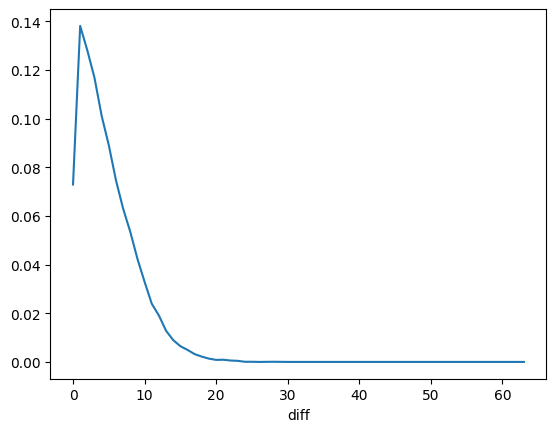

In [ ]:
(predictions["diff"].round().value_counts().sort_index()/predictions.shape[0]).plot()